# The Second Part of the Assignment of IDS 2019-2020
Document your results as well as the way you obtained them in this jupyter notebook. Separate reports (pdf, word, etc.) are _not_ required. However, it is necessary that you provide the python code leading to your results as well as textual answers to the assignment questions in this notebook. *DO NOT CLEAR THE OUTPUT of the notebook you are submitting!* In the cases that the result of an algorithm is pdf, jpg, etc, you should attach the result to this notebook file and refer to that in the text.  

Next to the jupyter notebook, submit one zip-file containing all data sets that you are asked to submit. Make sure they are easily identifiable, i.e. use names as requested in the corresponding question.

Do not change the general structure of this notebook, but you can add further markdown or code cells to explain your solutions if necessary. In the end, submit this file and your created data sets in moodle.

Only <font color="red">one </font> group member should upload your group's solution.*Make sure to include group members' names and matriculation numbers*. If your name and student id are not included in the report, you will not receive any points!


Hint 1: While answering the questions, you will get a better and better impression of the given data. <font color="red"><b>Ensure that all claims you make are supported by the presented facts!</b></font>

Hint 2: <font color="red"><b>Some of the tasks might need some time to run. Take this into account in your planning.</b></font>

Hint 3: RWTHonline allows for multiple submissions (each submission overwrites the previous ones). <font color="red"><b>Partial submissions are possible and encouraged. </b></font> This helps in case of technical problems of RWTHonline, which do seldomly happen.

<font color="red"><b>Student Names and IDs:
    1. Parag Shendye 384146
    2. Muhammad Hassan Maqsood 403346
    3. Prantik Chatterjee 391350

## Preprocessing of the Dataset (5 points)

The provided data set *air_pollution* contains hourly results of measuring the concentration of certain substances (CO, Benzene, NO2, particulate matter) and environmental conditions (temperature, relative humidity, traffic volume). This data was collected near a busy street in a city center by an automated device.

 You should carry out some preprocessing steps before starting the analysis:
 - Select 90% of 'air_pollution' dataset by random sampling. Use one of the group member's student number as a seed.
 - After completing this preprocessing step, export your final dataset as 'air_pollution_2.csv' dataset and use that for the next steps of the assignment.
 - If it is not directly mentioned, you should always use your extracted (above-created) dataset.
 - <font color='red'>Important!</font> Make sure that you submit your extracted dataset with your result in moodle.

In [5]:
#your code
import pandas as pd
df=pd.read_csv("C:/Users/Prantik Chatterjee/Desktop/AssignmentSecondPartDatasets/air_pollution.csv")
air_pollution = df.sample(frac=0.9, random_state=384146)
air_pollution.to_csv("C:/Users/Prantik Chatterjee/Desktop/AssignmentSecondPartDatasets/air_pollution2.csv")

In [4]:
air_pollution.head()

,Date,Time,CO,Benzene,NO2,Temperature,Humidity(%),Traffic_Volume,Particulate_Matter
6607,11.12.04,1:00:00,1.6,4.4,121,12.5,24.0,NaN,NaN
1447,10.05.04,2:00:00,-200.0,1.8,-200,14.4,60.1,118.812681,65.168569
1343,05.05.04,18:00:00,3.0,14.6,103,17.1,61.5,53.890418,127.940430
5457,24.10.04,21:00:00,1.3,7.3,72,21.2,63.4,NaN,NaN
5314,18.10.04,1:00:00,-200.0,4.4,-200,14.8,64.3,NaN,NaN


## Question 1 - Data Preprocessing and Data Quality (10 points)

For this question, use the extracted data set you created in the preprocessing step ('air_pollution_2.csv'), but without the features *Traffic_Volume* and *Particulate_Matter*. Remove those columns before answering the questions.

In [8]:
import pandas as pd
import numpy as np
import datetime 

col_drop = ["Traffic_Volume","Particulate_Matter"]
data = air_pollution.drop(col_drop,axis=1)
data.head() 

,Date,Time,CO,Benzene,NO2,Temperature,Humidity(%)
6607,11.12.04,1:00:00,1.6,4.4,121,12.5,24.0
1447,10.05.04,2:00:00,-200.0,1.8,-200,14.4,60.1
1343,05.05.04,18:00:00,3.0,14.6,103,17.1,61.5
5457,24.10.04,21:00:00,1.3,7.3,72,21.2,63.4
5314,18.10.04,1:00:00,-200.0,4.4,-200,14.8,64.3


(a) We want to get a first impression of the data. To achieve this, compute and show the following:
    - the column names (names of the features)
    - the data type of each feature
    - for time features: the minimum and maximum
    - for numerical (non-time) features: the mean, standard deviation, minimum and maximum
    - for categorical features: the number of classes and the value of the most frequent class

In [16]:
print("Column names: Data type")
for i in data.columns:
    print(i +" : "+ str(data[i].dtype))
print("Time feature details:")

Time_features = ["Date","Time"]
print("max_time: {}, min_time: {}".format(max(data["Time"]),min(data["Time"])))

numerical = ["CO","Benzene","NO2","Temperature","Humidity(%)"]
for i in numerical:
    mean = data[i].mean()
    sd = data[i].std()
    minval = min(data[i])
    maxval = max(data[i])
    print(mean, sd, minval,maxval)

Column names: Data type
Date : object
Time : object
CO : float64
Benzene : float64
NO2 : int64
Temperature : float64
Humidity(%) : float64
Time feature details:
max_time: 9:00:00, min_time: 0:00:00
-34.33657522859514 77.76439504781796 -200.0 11.9
1.6670110438190255 41.823893141244554 -200.0 63.7
57.952499703123145 127.11199963532957 -200 340
9.575489846811607 43.66157219016399 -200.0 44.6
39.33709773186074 51.73627695158373 -200.0 88.7


(b) Consider the features 'date' and 'time'. Combine them into a new column 'Datetime' using the datetime data type, and drop the old columns 'date' and 'time'. 

Which of the two representations of date and time do you think is more suitable for most analysis applications?

Explanation: 

In [17]:
#your code
data.loc[:,'Datetime'] = pd.to_datetime(data.Date.astype(str)+' '+data.Time.astype(str))
data.head()

,Date,Time,CO,Benzene,NO2,Temperature,Humidity(%),Datetime
6607,11.12.04,1:00:00,1.6,4.4,121,12.5,24.0,2004-11-12 01:00:00
1447,10.05.04,2:00:00,-200.0,1.8,-200,14.4,60.1,2004-10-05 02:00:00
1343,05.05.04,18:00:00,3.0,14.6,103,17.1,61.5,2004-05-05 18:00:00
5457,24.10.04,21:00:00,1.3,7.3,72,21.2,63.4,2004-10-24 21:00:00
5314,18.10.04,1:00:00,-200.0,4.4,-200,14.8,64.3,2004-10-18 01:00:00


(c) For each feature corresponding to a measured value, provide a simple scatter plot showing the data points over time. Can you spot any obvious data quality issues, e.g. inconsistencies, implausible values or missing values (without researching on specific domain knowledge)?

*Hint: you may perform additional computations to verify your findings.*

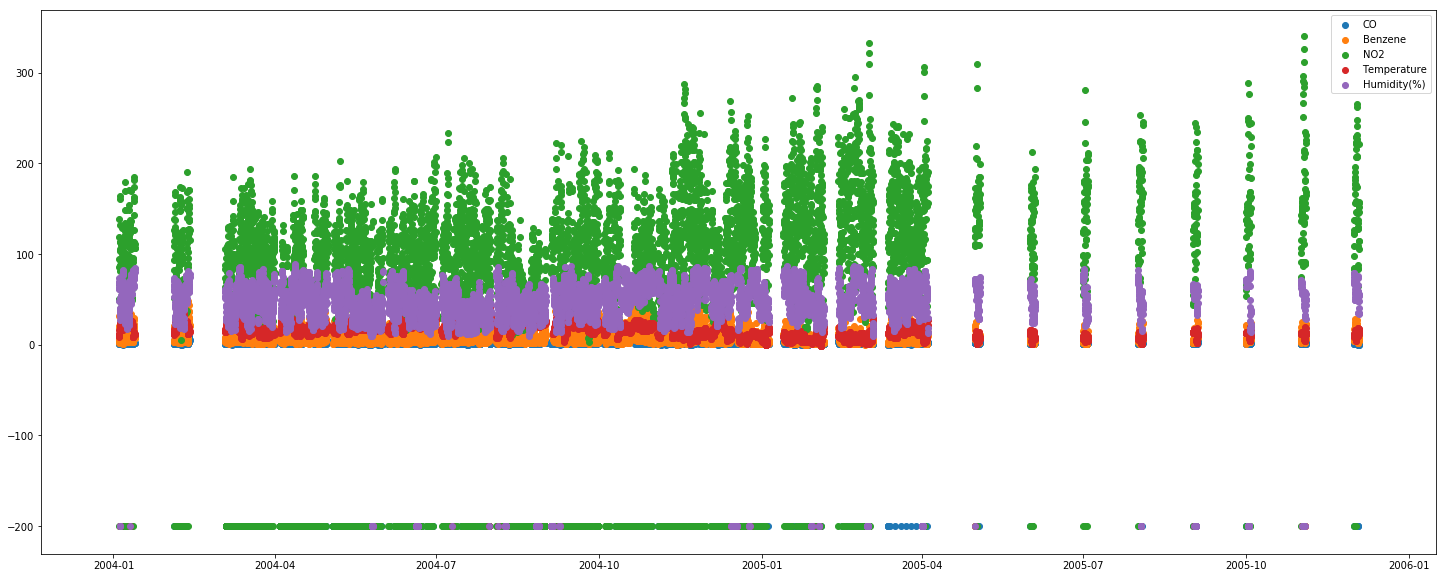

In [21]:
#your code
import matplotlib.pyplot as plt
%matplotlib inline

yaxis=["CO","Benzene","NO2","Temperature","Humidity(%)"]
xaxis = data["Datetime"]
plt.rcParams["figure.figsize"] = (25,10)
for j in range(len(yaxis)):
    plt.scatter(xaxis, data[yaxis[j]])
    plt.legend(prop={"size":10})
    

Explanation: 

(d) We need to handle any implausible or missing data. In the lecture, several strategies to do so have been introduced, for example, deleting data rows that contain missing/implausible values or replacing them by a value derived from other data points. 

In this question, consider implausible values to be the ones identified in question (c).

    1) For all numerical features, compute and show mean, standard deviation, minimum and maximum, while ignoring the missing and implausible values. Also, print the total number of data rows.
    
    2) Choose a strategy (or combination of strategies) to handle missing/implausible values. Create a cleaned data set with all those values handled accordingly.
    
    3) For all numerical features, compute and show mean, standard deviation, minimum and maximum with respect to your cleaned data set. Also print the total number of data rows.
    
    4) Motivate and explain your strategy and describe its (dis-)advantages compared to other options. Compare the computed statistical values before and after cleaning and briefly describe and evaluate any changes.

In [6]:
#your code

Explanation: 

## Question 2 - Data Preprocessing  and Advanced Visualization (15 points)

For this question, use the extracted data set you created in the preprocessing step ('air_pollution_2.csv').

(a) To create a suitable input for the following questions, modify the data set as listed below and then print the first 5 data rows:

    - Remove the columns 'Traffic_Volume' and 'Particulate_Matter'
    - Replace the columns 'Date' and 'Time' by a combined column 'Datetime' using the datetime data type
    - Restrict the data to the timeframe between 2004-04-01 and 2005-03-31
    - Drop all rows that contain a missing value or a value below -37
    
*Hint: You may be able to reuse some of your code or data sets created above.*

In [30]:
#your code
air_pollution = pd.read_csv("C:/Users/Prantik Chatterjee/Desktop/AssignmentSecondPartDatasets/air_pollution2.csv")
air_pollution.drop(['Traffic_Volume','Particulate_Matter'],axis=1, inplace=True)

air_pollution['DateTime'] = pd.to_datetime(air_pollution['Date'] + ' ' + air_pollution['Time']);
air_pollution = air_pollution.drop(['Date', 'Time'], axis=1)

air_pollution = air_pollution[(air_pollution['DateTime'] > '2004-04-01') & (air_pollution['DateTime'] < '2005-03-31')];
air_pollution.head()

air_pollution = air_pollution.dropna()
air_pollution.size

47719

(b) For temperature, humidity and CO compute the mean value for each month. Create two stream graphs based on this newly computed data, that visualize the change in temperature, CO and humidity over the months:

    1) For the first stream graph, simply use the mean values you computed for each month.
    
    2) For the second stream graph, first normalize the computed mean values by mapping them individually to an interval between 0 and 1, that is, apply Min-max normalization.

In [39]:
#your code
meantemp = air_pollution.Temperature.resample('M').mean();
meanCO = air_pollution.CO.resample('M').mean();
meanhumidity = air_pollution['Humidity(%)'].resample('M').mean();
display(meantemp);
display(meanCO);
display(meanhumidity);

DateTime
2004-04-30    19.065535
2004-05-31    17.455259
2004-06-30    12.424658
2004-07-31    26.528827
2004-08-31     5.460826
2004-09-30    11.910839
2004-10-31    19.858537
2004-11-30    14.724959
2004-12-31   -12.275439
2005-01-31     3.098790
2005-02-28     5.943124
2005-03-31     5.779916
Freq: M, Name: Temperature, dtype: float64

DateTime
2004-04-30   -83.179626
2004-05-31   -41.966945
2004-06-30    -8.469007
2004-07-31   -58.608469
2004-08-31   -67.726777
2004-09-30   -31.714860
2004-10-31   -61.434959
2004-11-30    -8.105583
2004-12-31   -40.017225
2005-01-31   -20.923185
2005-02-28    -0.930070
2005-03-31    -3.338075
Freq: M, Name: CO, dtype: float64

DateTime
2004-04-30    51.883192
2004-05-31    36.478631
2004-06-30    29.390753
2004-07-31    36.048208
2004-08-31    19.869917
2004-09-30    36.599126
2004-10-31    58.918374
2004-11-30    53.940066
2004-12-31    23.202552
2005-01-31    46.825202
2005-02-28    50.663869
2005-03-31    41.447490
Freq: M, Name: Humidity(%), dtype: float64

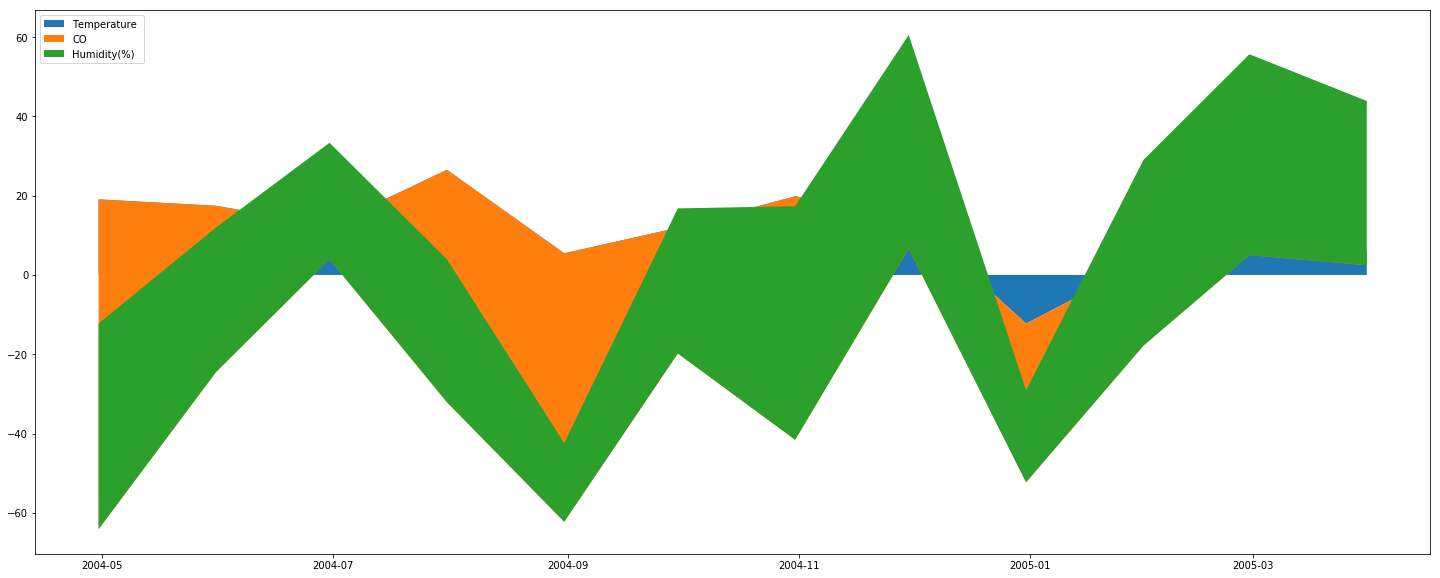

In [42]:
import matplotlib.pyplot as plt
a = list(meantemp.index.date)
b = list(meantemp.values)
c = list(meanCO.values)
d = list(meanhumidity.values)
y = np.vstack([b, c, d])
labels = ["Temperature ", "CO", "Humidity(%)"]
fig, ax = plt.subplots()
ax.stackplot(a, b, c, d, labels=labels)
ax.legend(loc='upper left')
plt.show()

In [44]:
from sklearn.preprocessing import MinMaxScaler
def scaling(data):
    data=data.reshape(-1,1)
    scaler = MinMaxScaler()
    scaler.fit(data)
    scaled_data=scaler.transform(data)
    return scaled_data
temp_monthly_scaled = scaling(meantemp.values)
CO_monthly_scaled = scaling(meanCO.values)
humidity_monthly_scaled =scaling(meanhumidity.values)

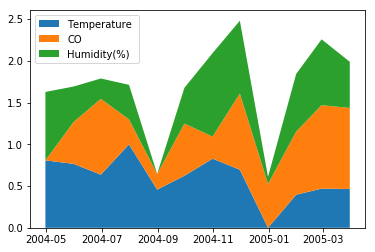

In [45]:
%matplotlib inline
x = list(meantemp.index.date)
y1 = temp_monthly_scaled.reshape(12)
y2 = CO_monthly_scaled.reshape(12)
y3 = humidity_monthly_scaled.reshape(12)

labels = ["Temperature ", "CO", "Humidity(%)"]

fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3, labels=labels)
ax.legend(loc='upper left')
plt.show()

(c) Answer the following questions based on the stream graphs created in question 2(a) and briefly explain how you derived the answer. Which of the two stream graphs do you consider more adequate to obtain the answers?

    1) In which month is the average CO lowest?
    
    2) Is there any correlation between humidity and CO?
    
    3) Between which months is temperature increasing?

Explanation:
1. CO lowest in September 2004.
2. Positive correlation is there between humidity and CO.
3. Temperature increased from Aug to Sept 2004.

(d) We want to create a heat map that visualizes the CO measured for different combinations of humidity and temperature. 
The heatmap should have 12 columns and 12 rows. The shown CO value should be the *median* of all values for the combination of humidity and temperature.

Modify the data as needed. Use a binning strategy of your choice for converting numerical data to categorical data. Motivate and explain all your choices and modifications.

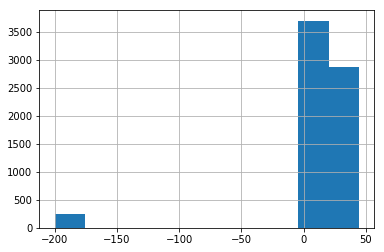

In [46]:
#your code
air_pollution['Temperature'].hist(bins=10) 

(e) Use the modified data to create a heat map as specified in question part (d). Answer the following questions based on that heat map and briefly explain how you derived your answer:

    1) For which combination of humidity and temperature values is the median CO highest? 
    
    2) How do you explain empty fields in your heat map?
    
    3) Is CO correlating with temperature, humidity, or both?

In [51]:
#your code
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.DataFrame({'Temperature': Temperature, 'CO': CO, 'Humidity': Humidity})
data_pivoted = data.pivot("Temperature", "CO", "Humidity")
ax = sns.heatmap(data_pivoted)
plt.show()

NameError: name 'Temperature' is not defined

Explanation:

## Question 3 - Clustering (15 points): 

(a) For this question, use the extracted data set you created in the preprocessing step ('air_pollution_2.csv'). Use a scatter diagram to find the relation between the 'Traffic_Volume' and 'Particulate_Matter' columns.

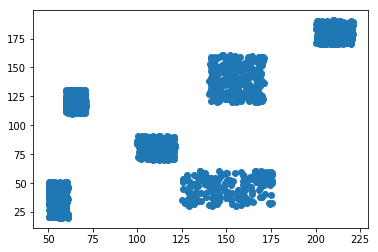

In [52]:
# Your code
from pandas.plotting import scatter_matrix
clustering = pd.read_csv("C:/Users/Prantik Chatterjee/Desktop/AssignmentSecondPartDatasets/air_pollution2.csv")
plt.scatter(clustering["Particulate_Matter"],clustering["Traffic_Volume"])

(b) From the previous question you found the relationship between two columns which are suitable for applying clustering methods. Find the two arrays corresponding to these to columns and drop nan values from them. Apply the k_means method for clustering the two mentioned columns. Use three different number of clusters for classifying.

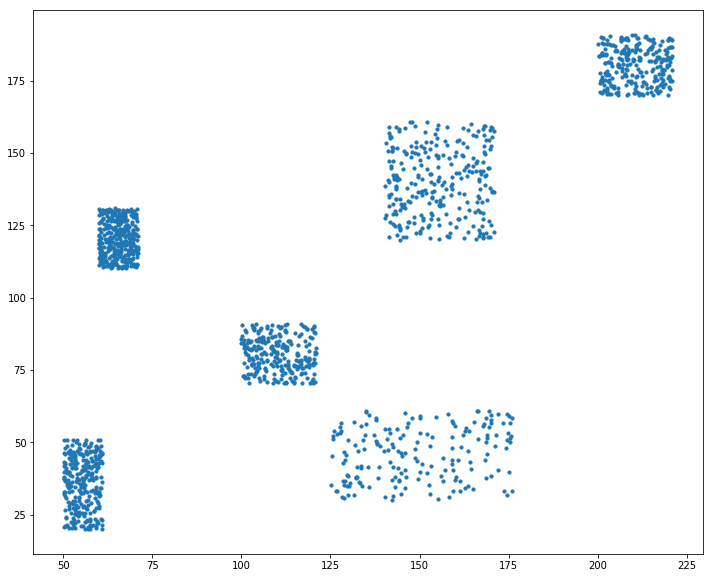

In [56]:
# Your code
particulate = clustering["Particulate_Matter"].dropna().values
traffic = clustering["Traffic_Volume"].dropna().values

plt.rcParams['figure.figsize'] = (12, 10)
plt.scatter(particulate, traffic, s =10)

In [ ]:
# Your code

(c) Apply the DBSCAN method for clustering the two mentioned columns. Use three different eps and min_samples for clustering.

[-1, 0, 1, 2, 3, 4, 5, 6, 7]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

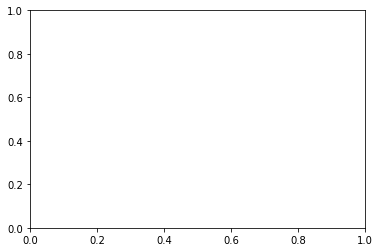

In [59]:
# Your code
from sklearn.cluster import DBSCAN

cluster = np.array(list(zip(particulate,traffic)))
epslist=[4,12,22]
min_sampleslist=[5,10,20]
typeDBSCAN=["Low Neighbours","Mid Neighbours","High Neighbours"]

for i, j, k in zip(epslist, min_sampleslist,typeDBSCAN):
    dbscan = DBSCAN(eps = i, min_samples=j).fit(cluster)
    clusters = dbscan.labels_
    cindex = np.unique(clusters).tolist()
    print(cindex)
    fig, plots = plt.subplots()
    for ci in cindex :
        sub_set = np.array([cluster[i] for i in range(len(cluster)) if clusters[i] == cindex])
        if len(sub_set) == 0 :
            continue
        plots.scatter(sub_set[:,0], sub_set[:,1],s=10)
        plt.title(k)

(d) Compare k_means and DBSCAN results. Which of these methods is more suitable for clustering this data? Why?

In [14]:
# Your code

Explanation:

(e) Add noise to the two mentioned columns. For adding noise, first find the range of these two columns and add a random number of 30 samples of noise in the range of each column to that. Plot the scatter diagram again.
Repeat k_means and DBSCAN algorithms for clustering. Which of these methods is more suitable for clustering this data? Why?

In [15]:
# Your code

Explanation:

## Question 4 - Frequent itemsets and association rules (15 points): 

(a) You should carry out some preprocessing steps before starting the analysis:
 - Select 90% of 'applications' dataset by random sampling. Use one of the group member's student number as a seed.
 - After completing this preprocessing step, export your final dataset as 'applications_2.csv' dataset and use that for the next steps of the assignment.
 - <font color='red'>Important!</font> Make sure that you submit your extracted dataset with your result in moodle.

In [16]:
# Your code

(b) Find the most frequent itemsets with the support of more than 0.4 by using the Apriori algorithm (Hint: When you are creating rows to make the data_set, you should use none_empty strings).

In [17]:
# Your code

(c) Find the most frequent itemsets with the support of more than 0.4 by using the Apriori algorithm having more than 2 members.

In [18]:
# Your code

(d) Find the itemsets having min_confidence=0.3 and min_lift=1.2. Print support, confidence and lift of filtered rules in one table.

In [19]:
# Your code

## Question 5 - Text Mining (15 points)

Among the datasets given for this assignment you will find the files "pg_train" and "pg_test". These two files contain a labeled corpus, already splitted in training and test set.
The corpus consists of sentences from several novels, labeled with the name of the author. The first task is text classification: you will train a set of classifiers that predict the author of a piece of text.

(a) Perform preprocessing on the training corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a binary document-term matrix; train a logistic classifier with the author as target.

In [20]:
# Your code

(b) Perform preprocessing on the training corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a document-term matrix of counts; train a logistic classifier with the author as target.


In [21]:
# Your code

(c) Perform preprocessing on the training corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a tf-idf scores document-term matrix; train a logistic classifier.


In [22]:
# Your code

(d) Perform preprocessing on the training corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a doc2vec embedding in order to reduce the dimension of the document vector to 300; use the doc2vec model you just trained to convert the training set to a set of document vectors; train a logistic classifier with the author as target.


In [23]:
# Your code

(e) Predict the classification with the four models on the test data.

In [24]:
# Your code

(f) Obtain confusion matrices for the four different models.


In [25]:
# Your code

(g) Obtain accuracy and f1-score for the four different models.


In [26]:
# Your code

(h) Briefly comment on the quality of the predictions for the four models.

Explanation:


(i) For the two authors Austen and Chesterton separately, build a bigram language model. You should use both training and test data to build the model. Do not perform stemming or stopword removal for this task, but do use the other preprocessing steps described in (a). Use both right and left padding, and manage unknown terms by using a dedicated token.

In [27]:
# Your code

(j) For each author, use the correspondent language models from (i) to generate, using MLE, a sentence of fifteen words starting from each of the following terms:

In [28]:
'She'
'They'
'It'

'It'

(k) Now, computer another two models (for Austen and Chesterton separately), build a trigram model with the same data as in (i). Use both right and left padding, and manage unknown terms by using a dedicated token.

In [29]:
# Your code

(l) For each author, use the correspondent language models from (k) to generate, using MLE, a sentence of fifteen words starting from each of the same terms as question (j):

In [30]:
# Your code

(m) Comment on the quality of the models and generated text. Which model performs better? In general, which differences are there in using trigrams as opposed to bigrams?

Explanation:


## Question 6 - Process Mining (15 points)
For this part, refer to the online docs of pm4py (https://pm4py.fit.fraunhofer.de/).
Important: if you did not do it in the instruction, you should make sure to have the latest pm4py version: to get it is sufficient to type `pip install pm4py --upgrade`.
In this section of the assignment you will be working with a real life event log, derived from the activity of the help desk department of an Italian software company. The data is contained in the file "event_log.xes".

(a) Use the provided event log and identify the least frequent variant and the most frequent variant.


In [31]:
# Your code

(b) Remove all the variants that contain less than 1% of the traces in the log. Create a new event log without these variants.

In [32]:
# Your code

(c) Use Inductive miner algorithm to discover the process model based on you new event log (the filtered log without the infrequent variants of question (b)).


In [33]:
# Your code

(d) Perform the token replay conformance checking using your discovered model (c) and the original event log. Does your process model fit the log?


In [34]:
# Your code

Explanation:


(e) Calculate the fitness of the model in (c).

In [35]:
# Your code

(f) Are there any deviations between the process model and the event log? If so, where and why?

Explanation:


(g) Now use the original event log and remove the two most frequent variants, and discover the model based on your new event log (the filtered log without two most frequent variants).


In [36]:
# Your code

(h) Perform the token replay conformance checking using the newly discovered model of question (g) and the original event log. Does your process model fit the log?

In [37]:
# Your code

Explanation:


(i) Calculate the fitness of the model in (g).

In [38]:
# Your code

(j) Are there any deviations in the process model? If so, where and why?

Explanation:

(k) Use the complete event log (original event log) and discover your process model using Inductive Miner.


In [39]:
# Your code

(l) Do the token replay conformance checking using your newly discovered model and the original event log. Does your process model fit the log?

In [40]:
# Your code

Explanation:

(m) How are these three discovered process models different from each other? Which model is the best fitting to the original log? Why?

Explanation:


(n) Visualize the model discovered in question (k) enriched with frequency information. Subsequently, visualize that same model enriched with performance information.

In [41]:
# Your code

(o) If you were the process owner and you had more resources to hire employees, on which parts of the process would you assign them to maximize efficiency?

Explanation:


(p) Add your further comments and considerations on the frequency and performance informations. Does the process have a "happy path", and is it shown in the enhanced process models? Where are the major bottlenecks in this process? Is there any rework?

Explanation:
